# EXPLORATORY DATA ANALYSIS ON A DATASET

### Dataset:

1.	LB - Likely stands for "Baseline Fetal Heart Rate (FHR)" which represents the average fetal heart rate over a period.
2.	AC - Could represent "Accelerations" in the FHR. Accelerations are usually a sign of fetal well-being.
3.	FM - May indicate "Fetal Movements" detected by the monitor.
4.	UC - Likely denotes "Uterine Contractions", which can impact the FHR pattern.
5.	DL - Could stand for "Decelerations Late" with respect to uterine contractions, which can be a sign of fetal distress.
6.	DS - May represent "Decelerations Short" or decelerations of brief duration.
7.	DP - Could indicate "Decelerations Prolonged", or long-lasting decelerations.
8.	ASTV - Might refer to "Percentage of Time with Abnormal Short Term Variability" in the FHR.
9.	MSTV - Likely stands for "Mean Value of Short Term Variability" in the FHR.
10.	ALTV - Could represent "Percentage of Time with Abnormal Long Term Variability" in the FHR.
11.	MLTV - Might indicate "Mean Value of Long Term Variability" in the FHR.

In [223]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1.	Data Cleaning and Preparation:

In [225]:
# load the dataset
df = pd.read_csv("Cardiotocographic.csv")

In [226]:
# check the rows and columns numbers
df.shape

(2126, 14)

In [227]:
# shows first 5 rows
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [228]:
# display last 5 rows
df.tail()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
2121,140.0,0.000000,0.961268,0.007426,0.0,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.0,2.000000
2122,140.0,0.000775,0.000000,0.006979,0.0,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.0,2.000000
2123,140.0,0.000980,0.000000,0.006863,0.0,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.0,1.990464
2124,140.0,0.000679,0.000000,0.006110,0.0,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.0,2.000000
2125,142.0,0.001616,-0.000188,0.008078,0.0,0.0,0.0,74.0,0.4,35.857183,5.0,42.0,0.0,1.000000


In [229]:
# check the missing values
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [230]:
# imputing the missing values with median of respective column
for column in df.columns:
    df[column] = df[column].fillna(df[column].median())
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [231]:
# check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Tendency  2126 non-null   float64
 13  NSP       2126 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [232]:
# check the number of uniques values in each column
df.nunique()

LB           153
AC          1068
FM           776
UC          1364
DL           822
DS           114
DP           264
ASTV         183
MSTV         165
ALTV         195
MLTV         351
Width        261
Tendency     111
NSP          111
dtype: int64

In [233]:
# summary statistics
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.340204,0.003204,0.009894,0.004391,0.001895,0.000002,0.000173,46.995984,1.364378,10.285964,8.276147,70.395387,0.313246,1.301499
std,11.214379,0.004373,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734851,42.720508,0.643186,0.642133
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


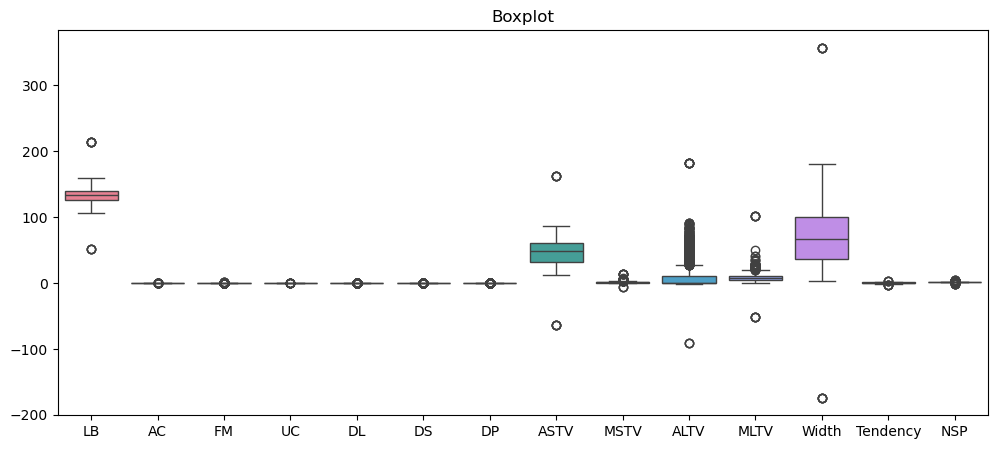

In [234]:
# boxplot to identify outliers
fig = plt.figure(figsize=(12,5))
sns.boxplot(data=df)
plt.title("Boxplot")
plt.show()

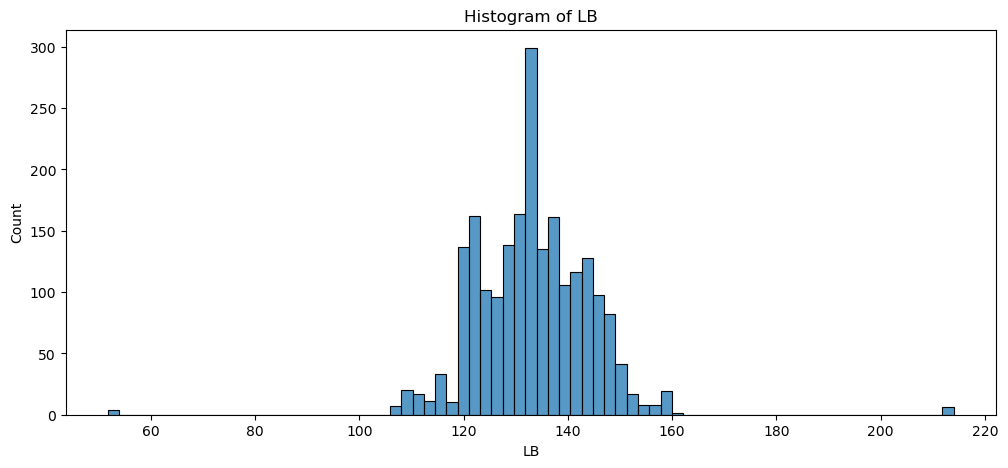

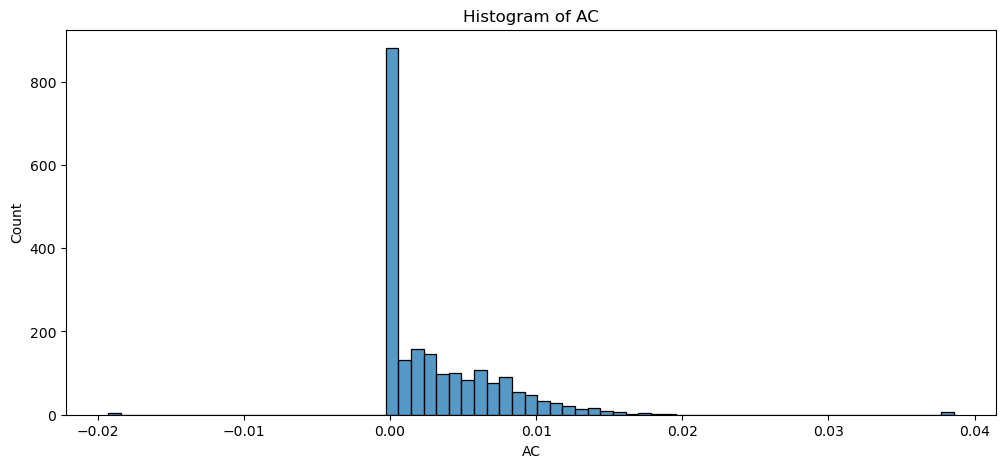

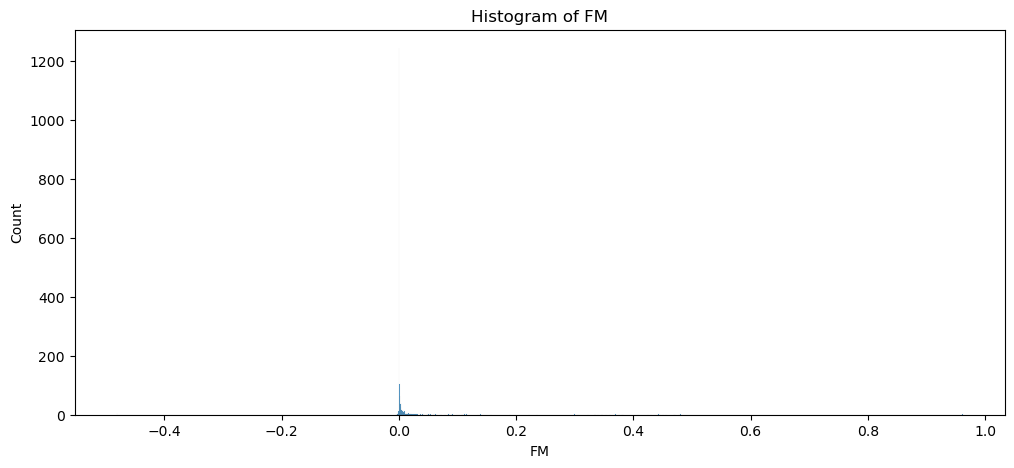

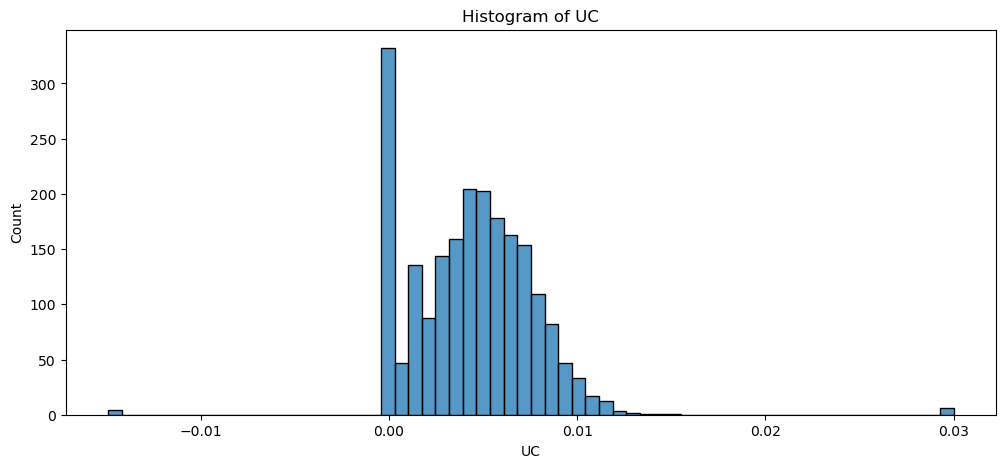

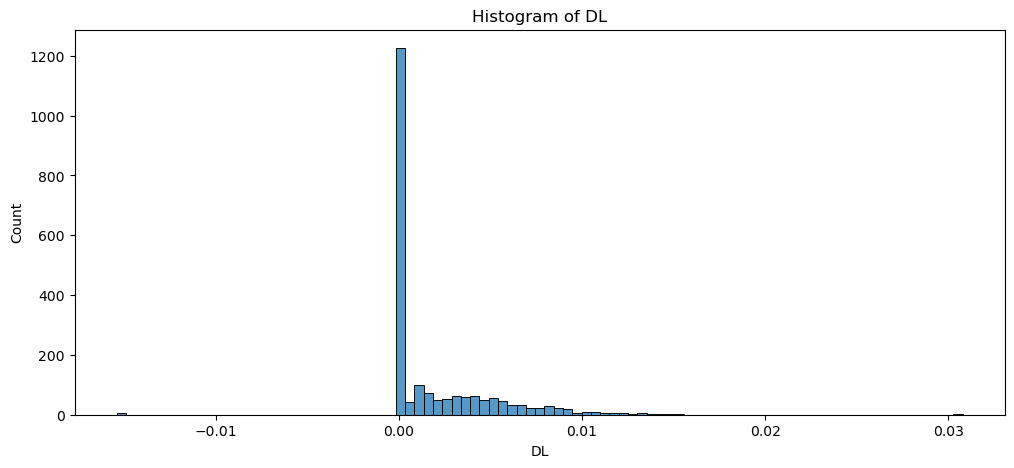

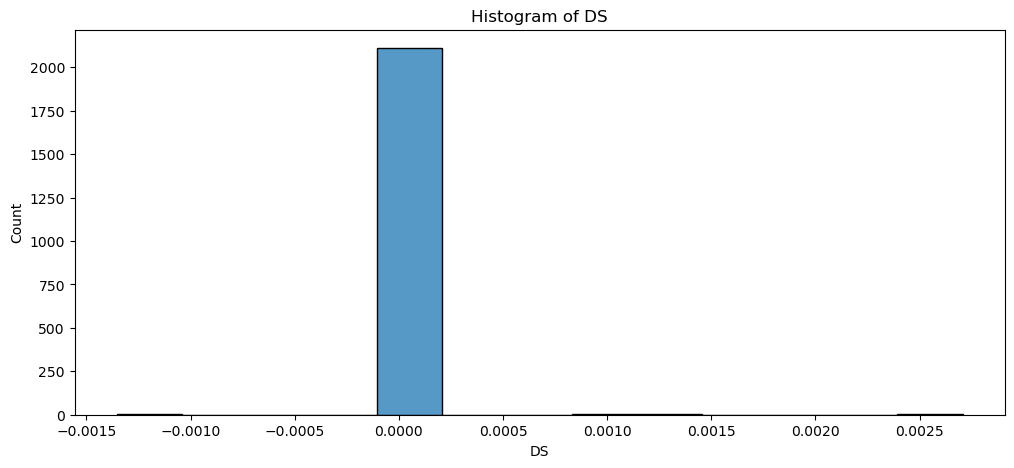

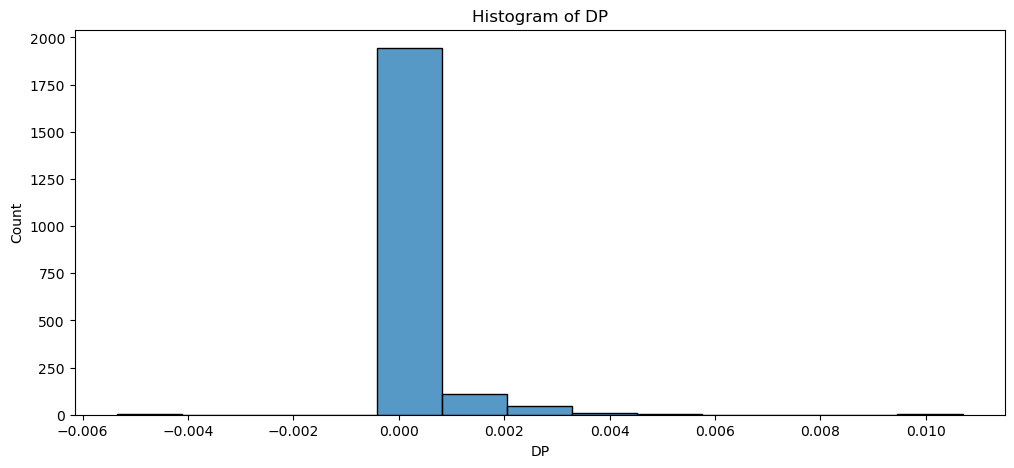

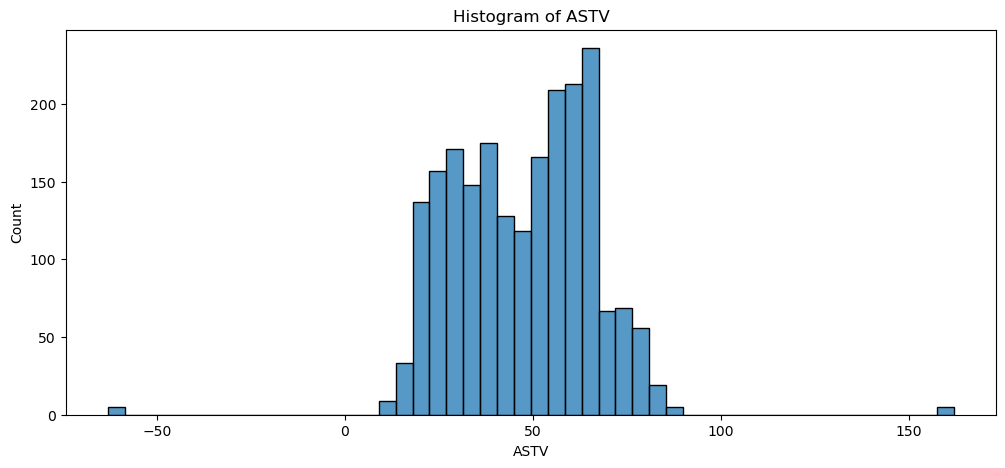

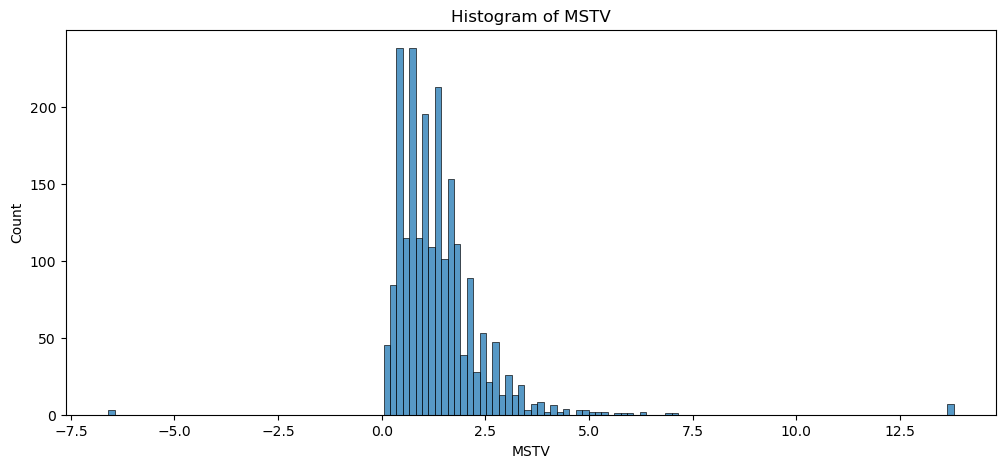

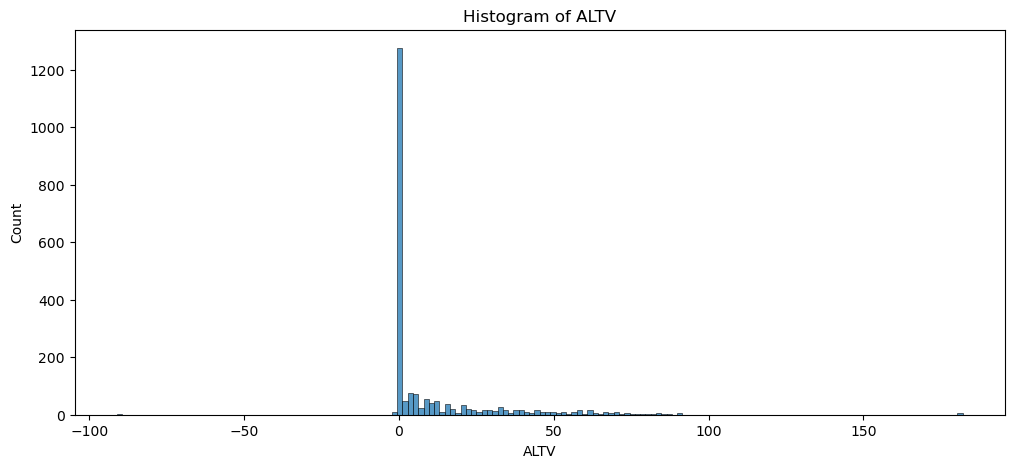

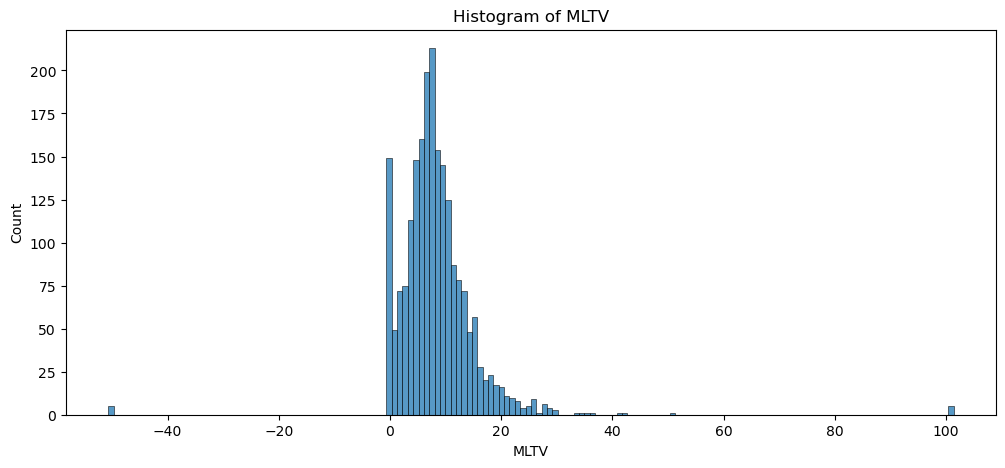

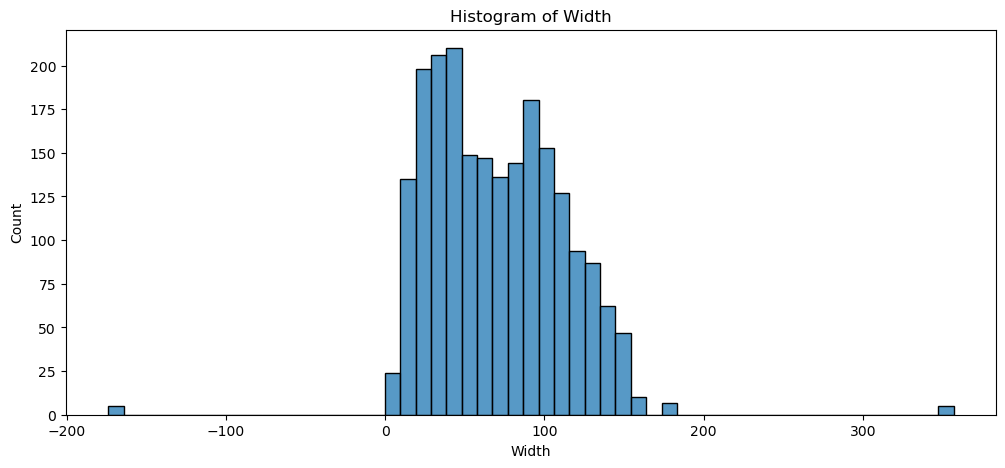

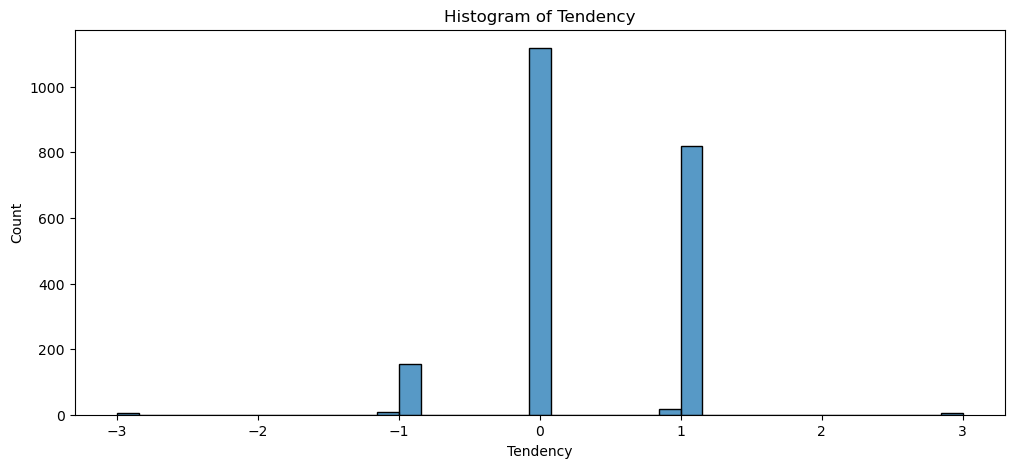

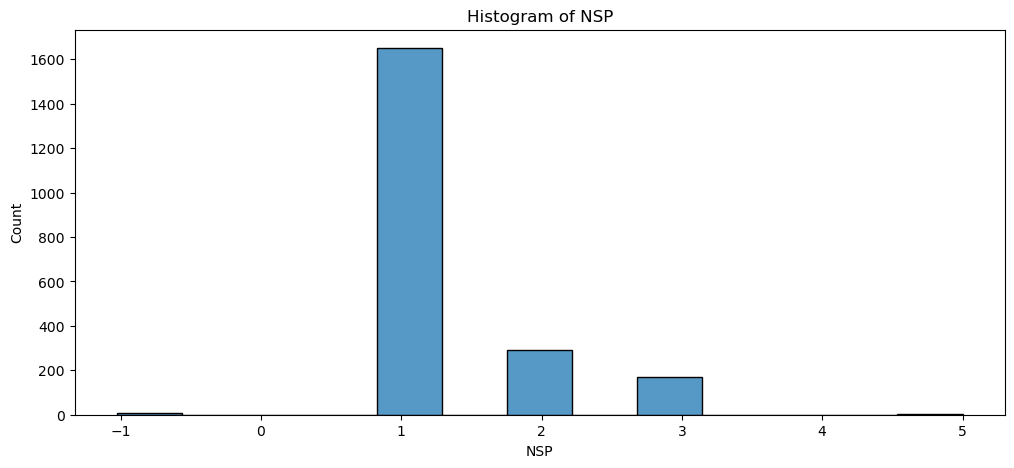

In [235]:
# histogram to check outliers and data distribution
for column in df.columns:
    fig = plt.figure(figsize=(12,5))
    sns.histplot(data=df[column])
    plt.title(f"Histogram of {column}")
    plt.show()

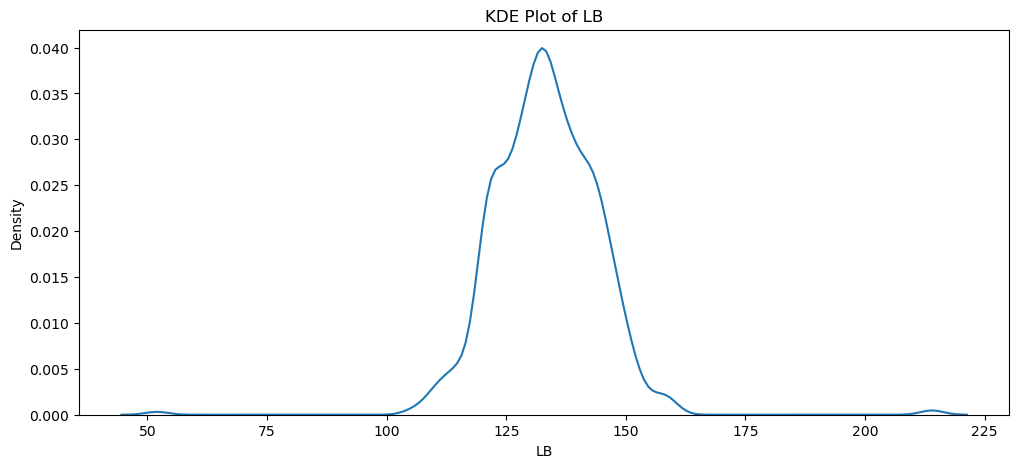

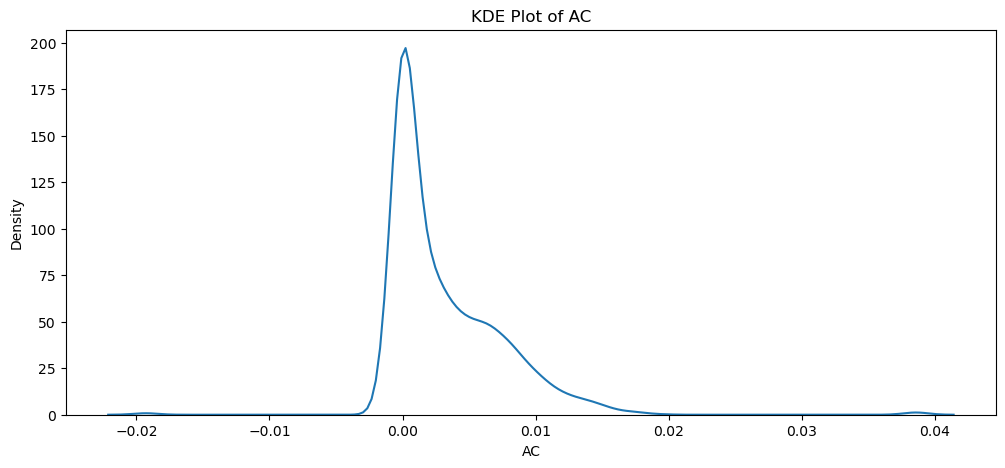

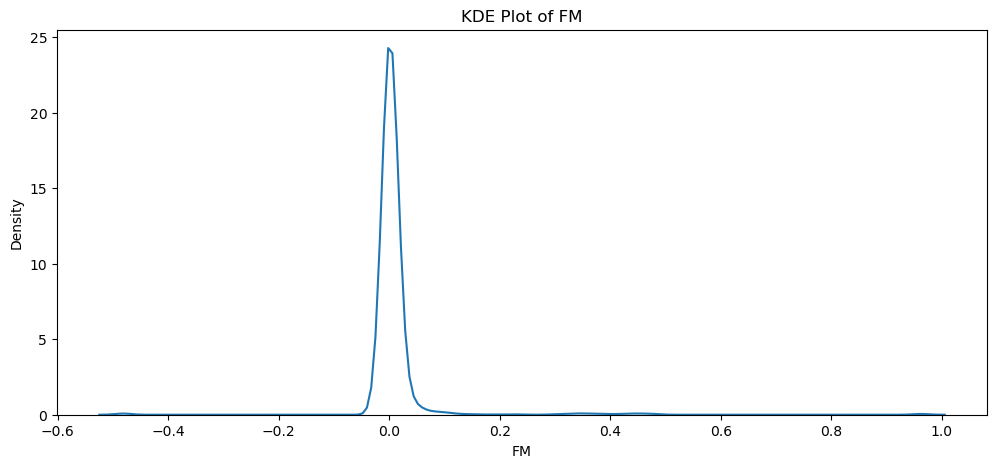

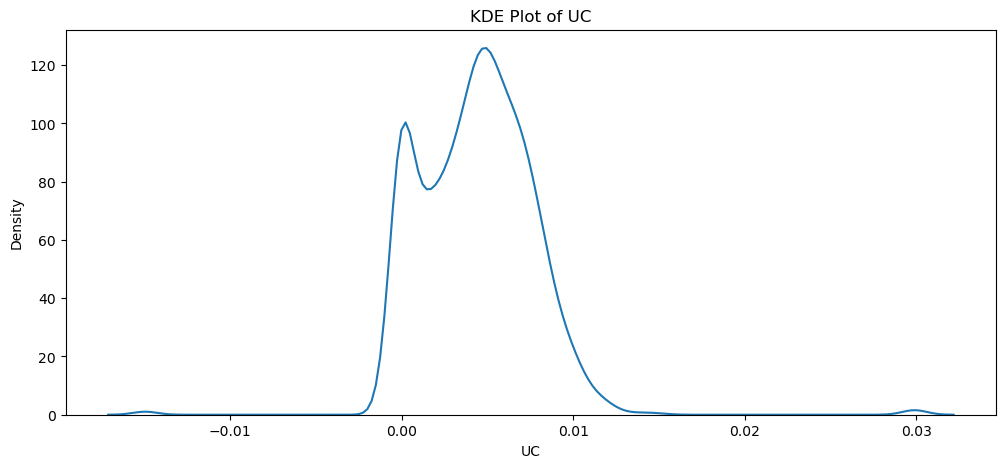

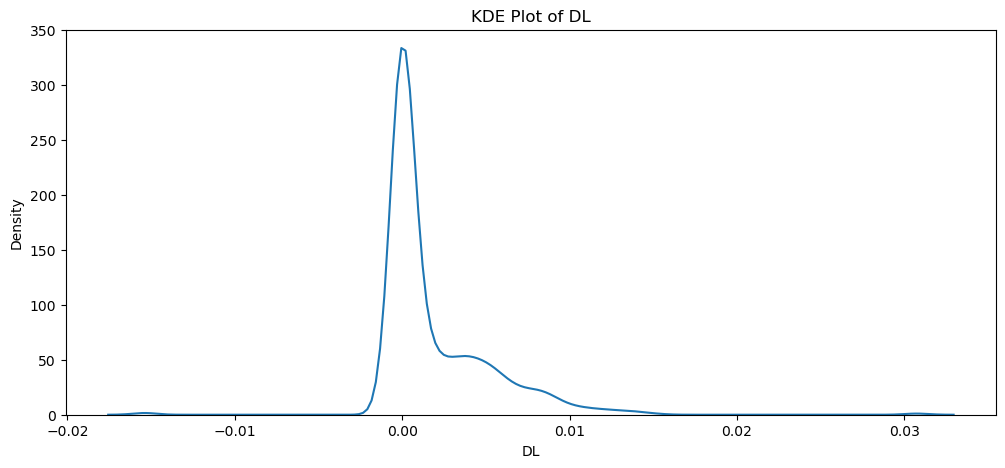

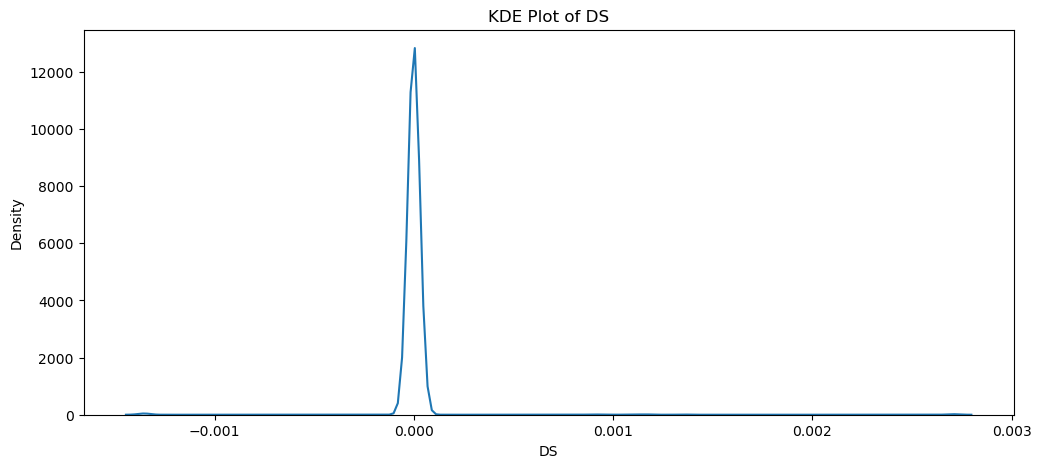

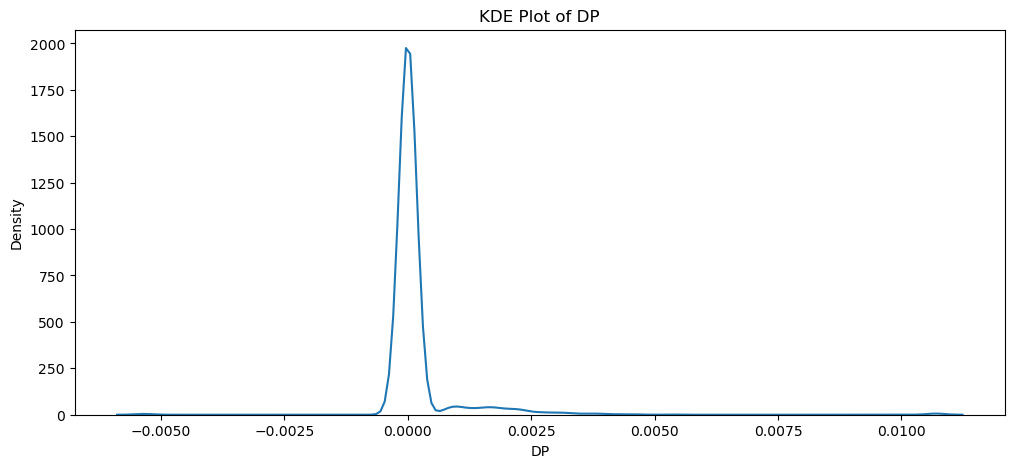

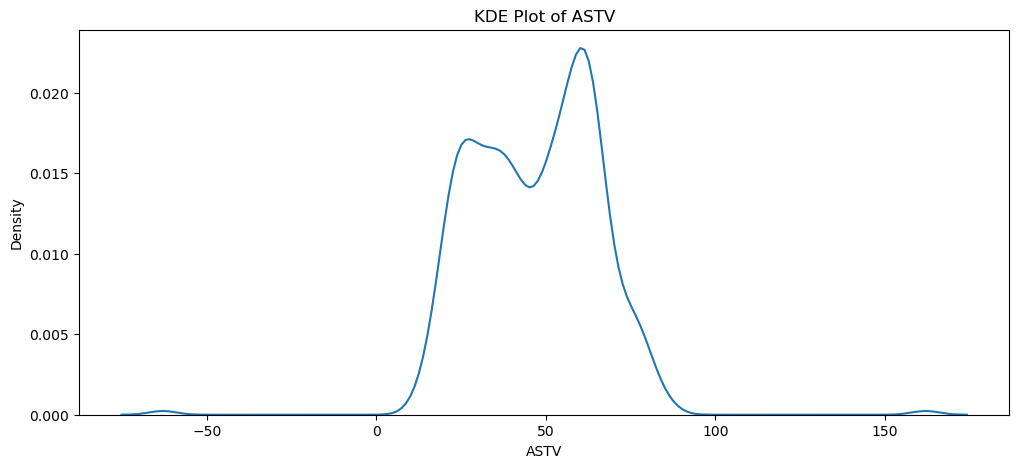

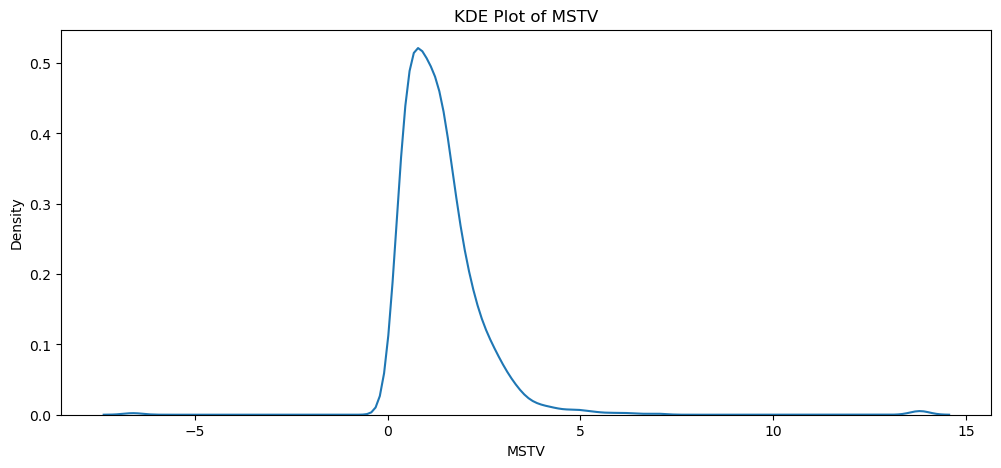

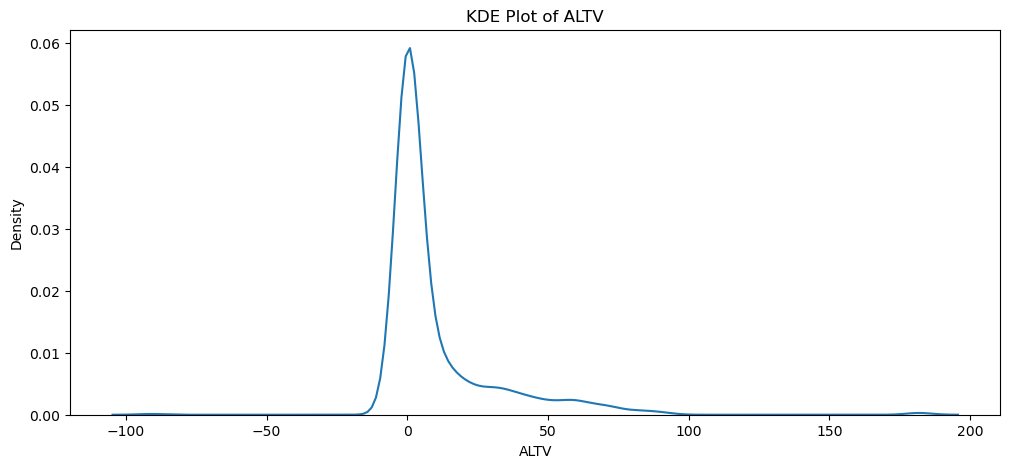

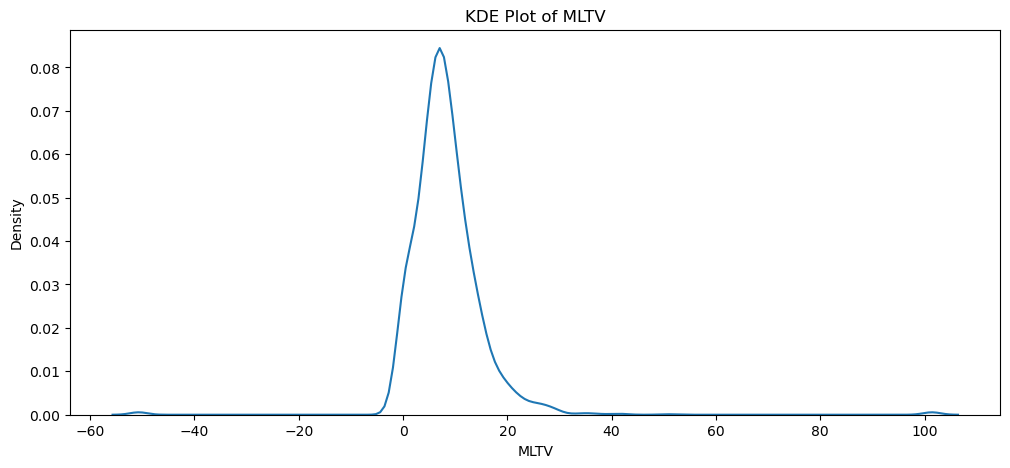

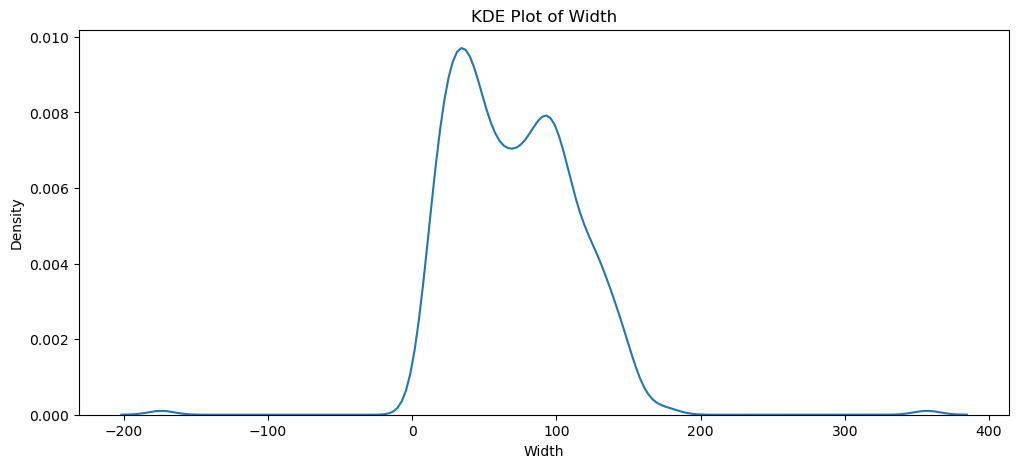

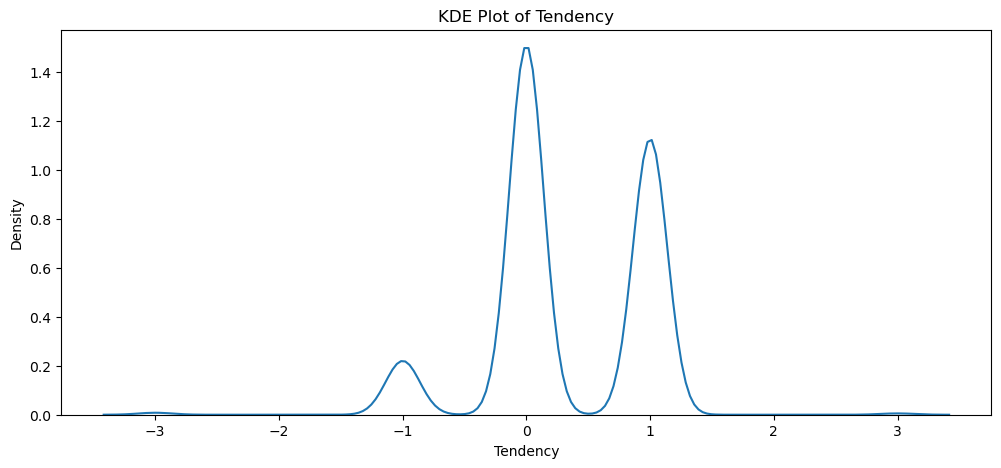

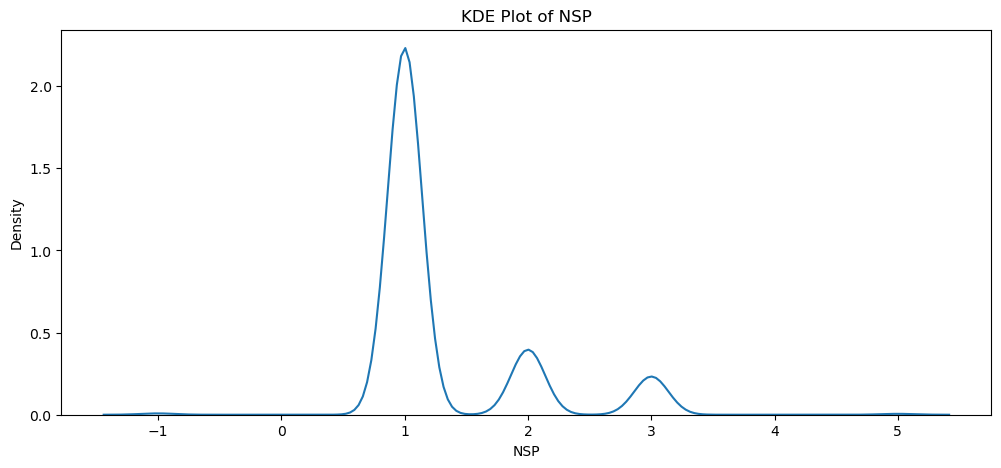

In [236]:
# KDE plot to visualize the data distribution
for column in df.columns:
    fig = plt.figure(figsize=(12,5))
    sns.kdeplot(data=df[column])
    plt.title(f"KDE Plot of {column}")
    plt.show()

In [237]:
# treating outliers by using IQR method
columns = ['LB', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width']
for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

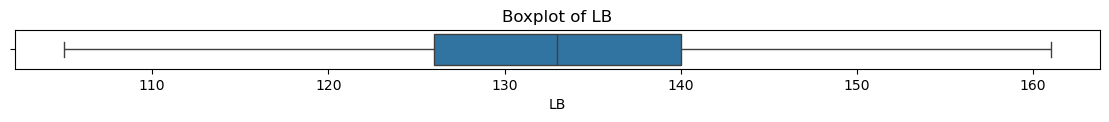

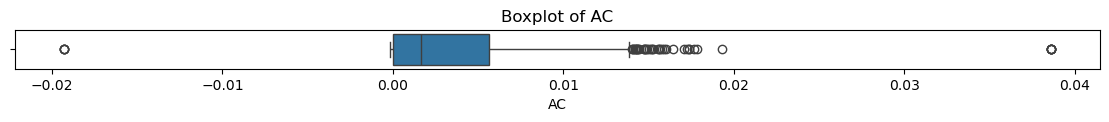

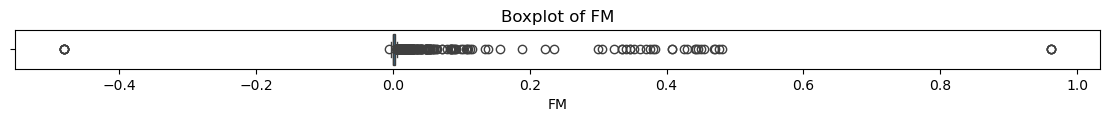

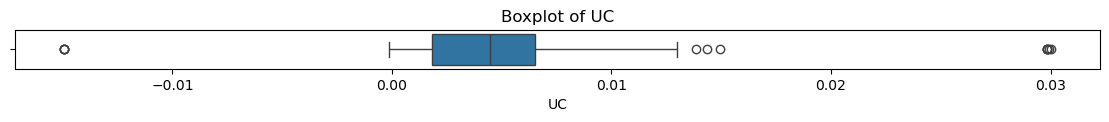

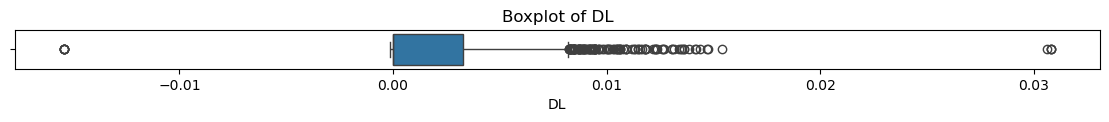

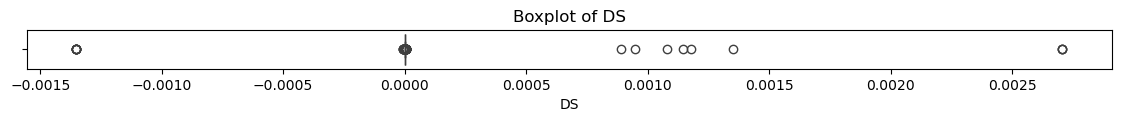

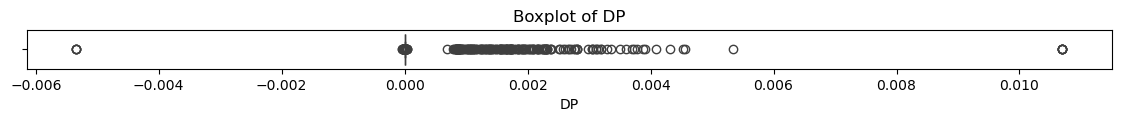

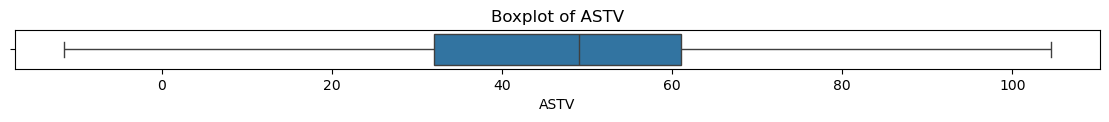

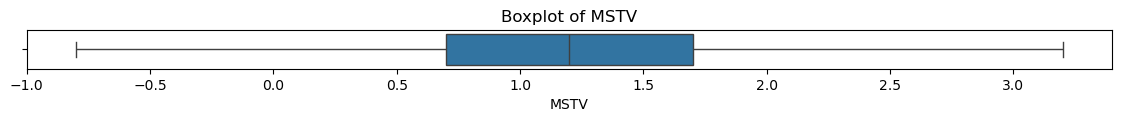

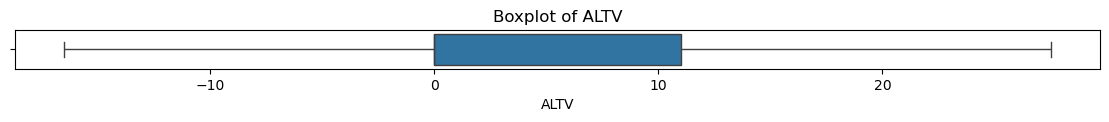

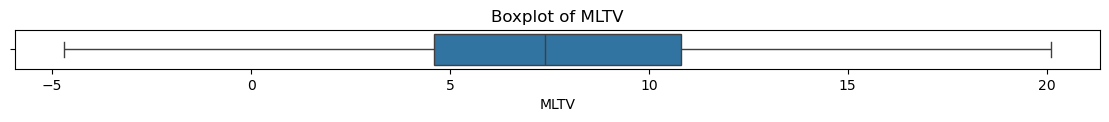

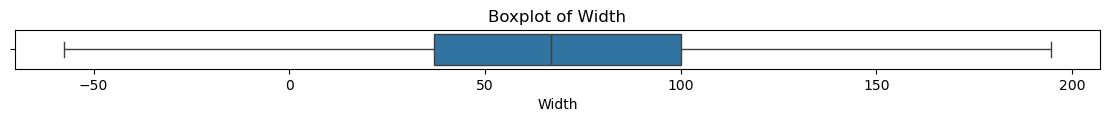

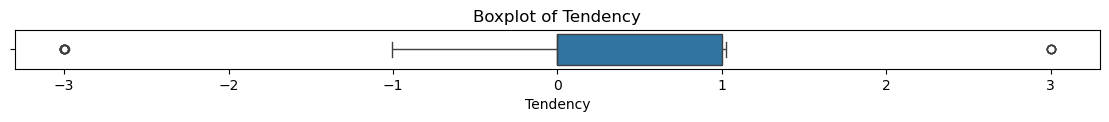

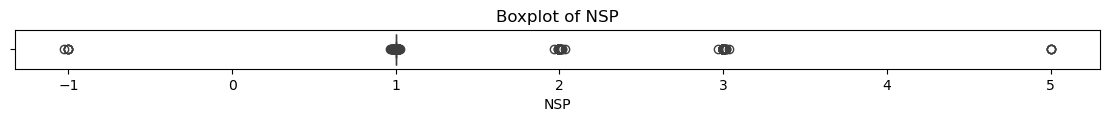

In [238]:
# checking the outliers using boxplot after treating outliers
for column in df.columns:
    fig = plt.figure(figsize=(14, 0.5))
    sns.boxplot(data=df, x=column)
    plt.title(f"Boxplot of {column}")
    plt.show()

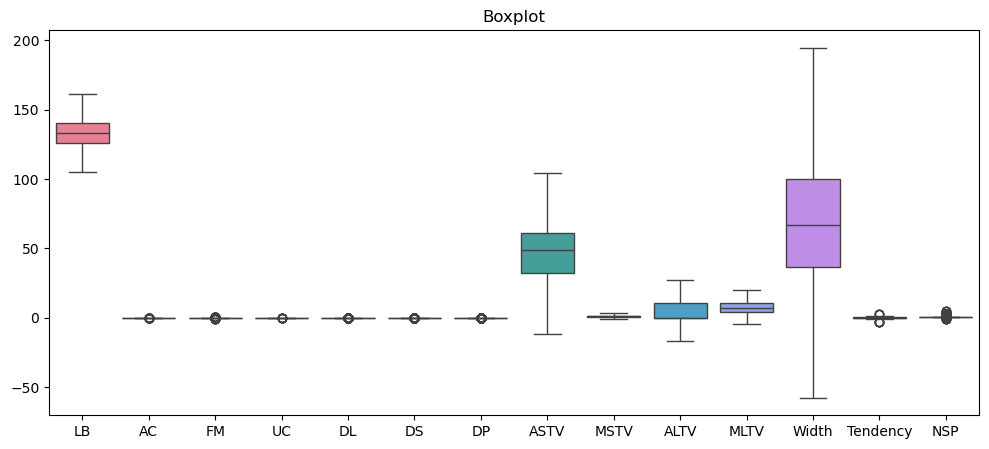

In [239]:
# checking outliers for all columns in single plot
fig = plt.figure(figsize=(12,5))
sns.boxplot(data=df)
plt.title("Boxplot")
plt.show()

## 2.	Statistical Summary:

In [241]:
# summary statistics after treating ouliers
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.290331,0.003204,0.009894,0.004391,0.001895,0.000002,0.000173,46.981873,1.304644,6.691678,8.007471,70.287203,0.313246,1.301499
std,9.930268,0.004373,0.067540,0.003340,0.003343,0.000141,0.000836,17.612745,0.781091,10.378400,5.047078,39.571995,0.643186,0.642133
min,105.000000,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-11.500000,-0.800000,-16.500000,-4.700000,-57.500000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,161.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,104.500000,3.200000,27.500000,20.100000,194.500000,3.000000,5.000000


In [242]:
# data in all column almost normal distribution because median and mean values are near to each other

## 3.	Data Visualization:

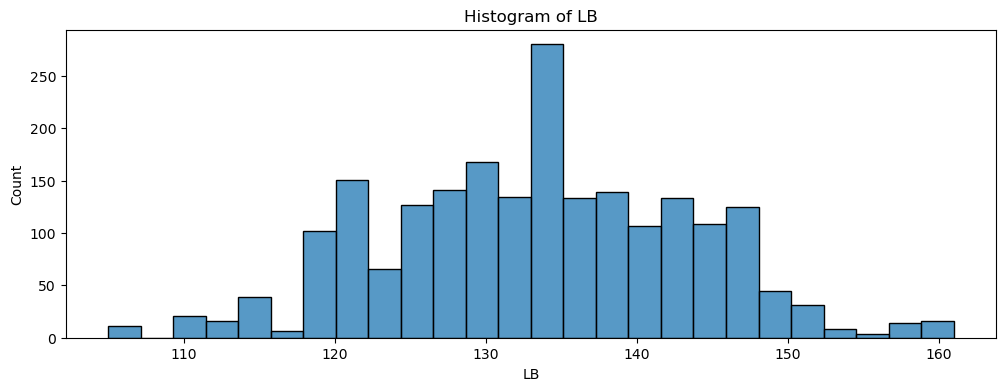

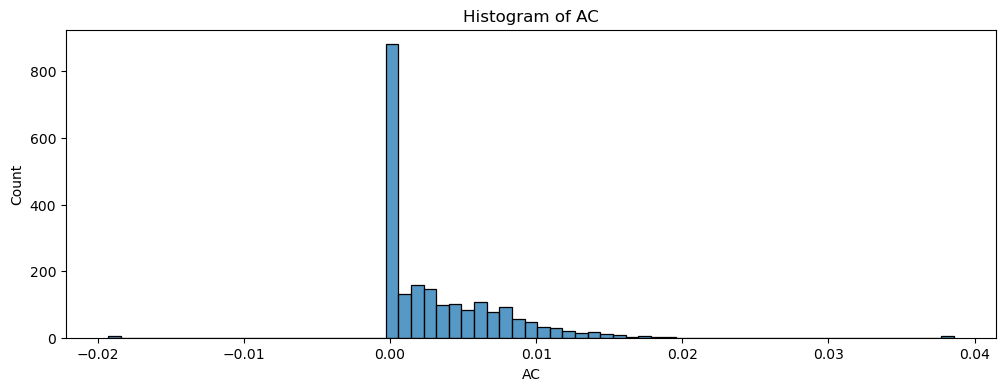

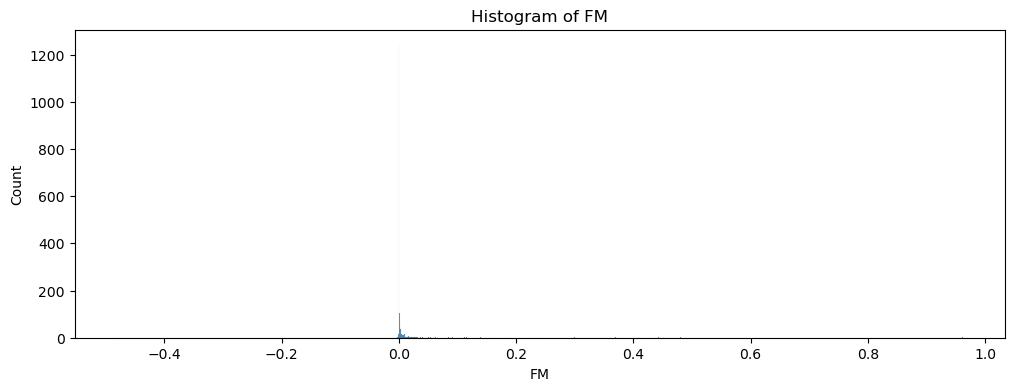

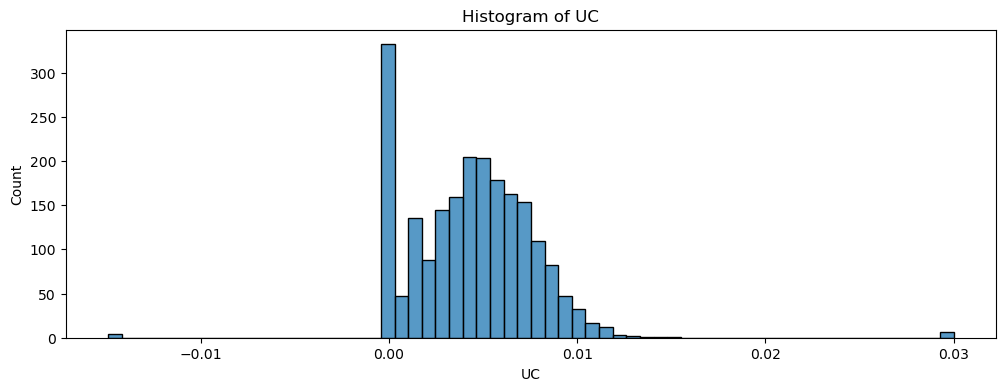

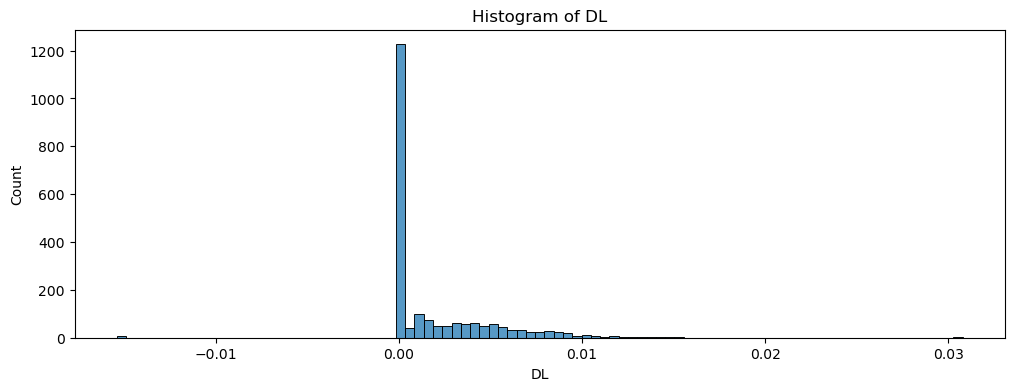

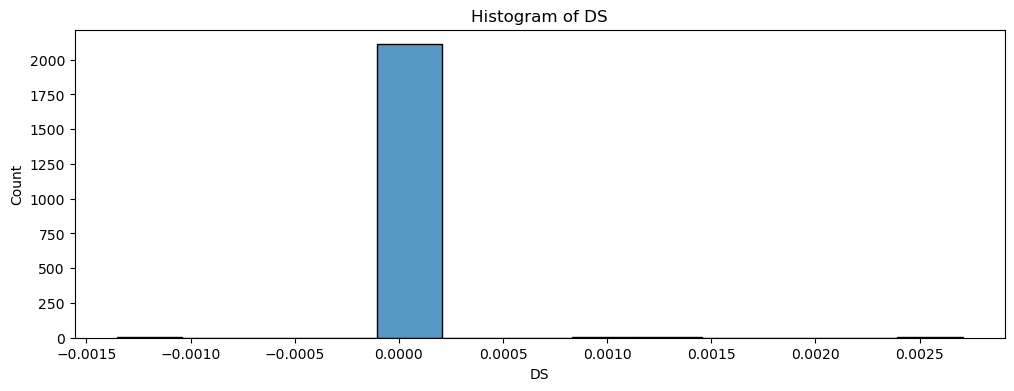

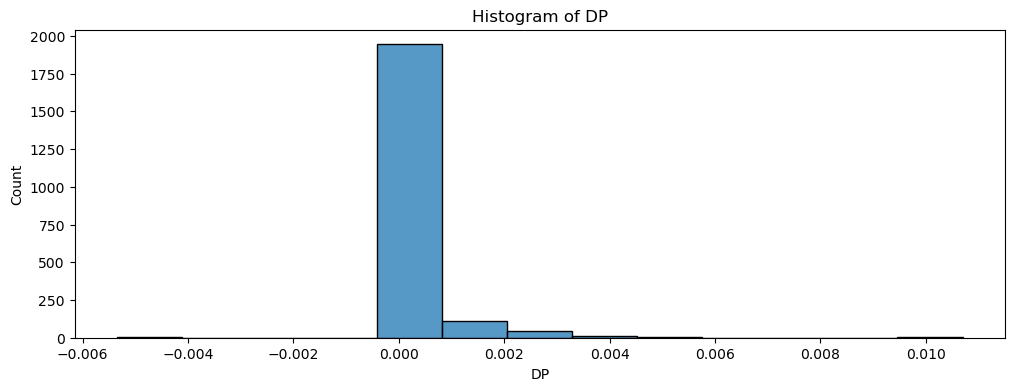

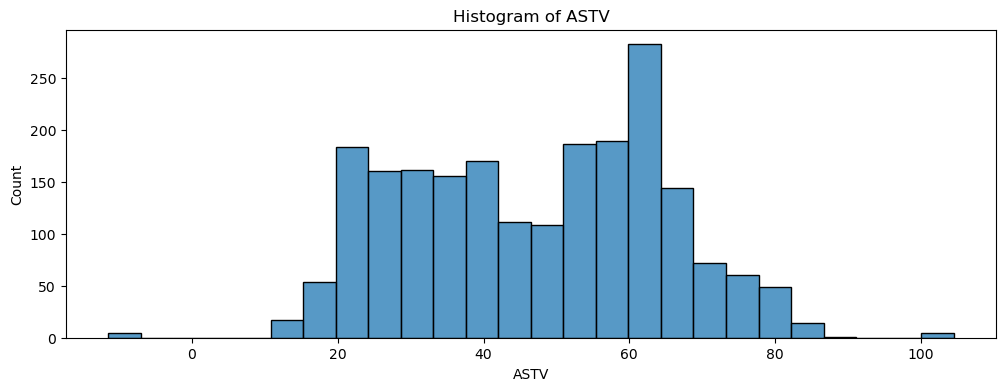

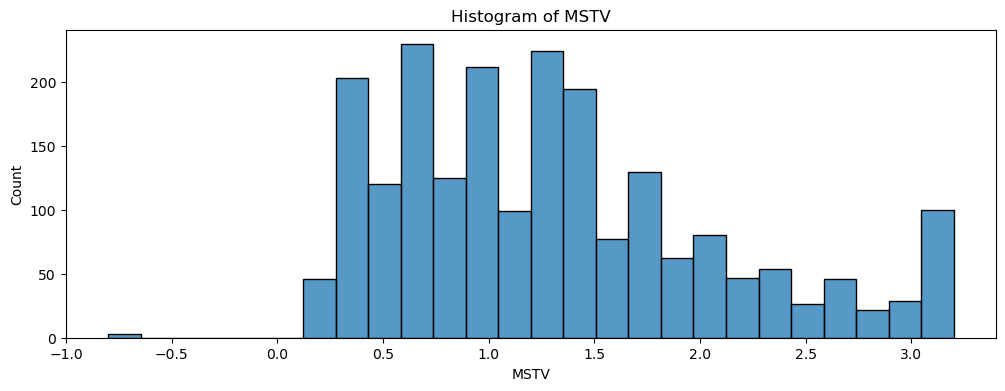

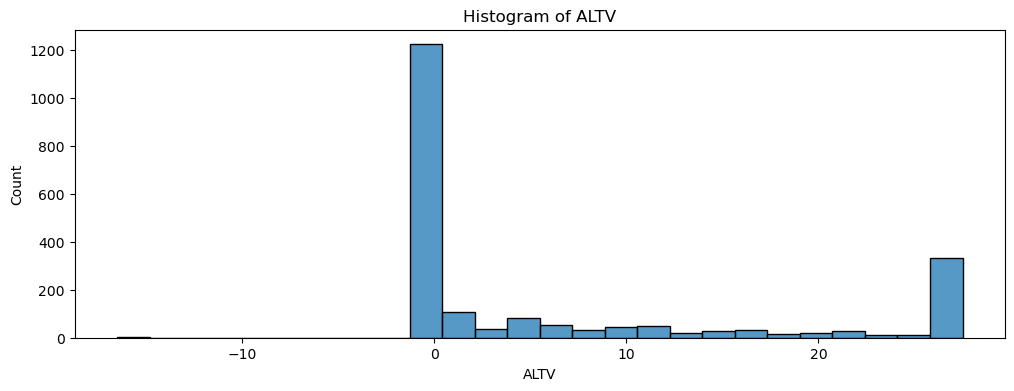

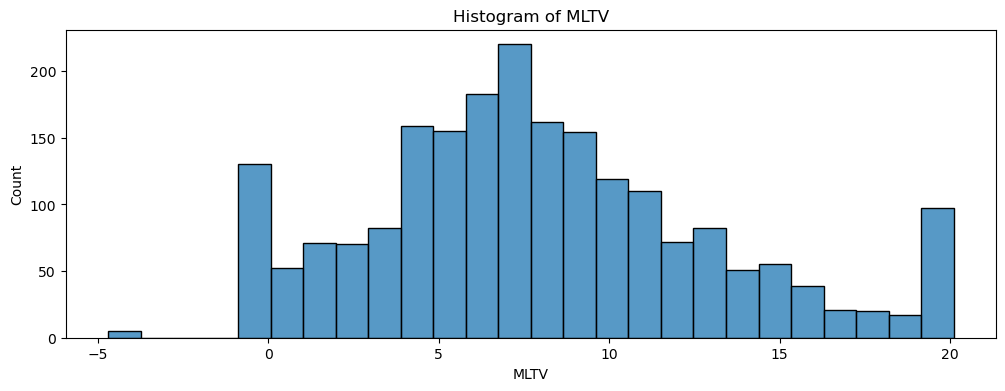

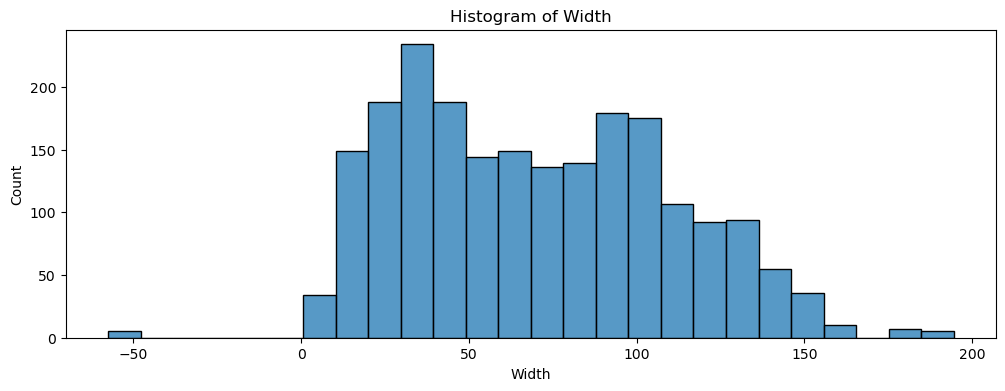

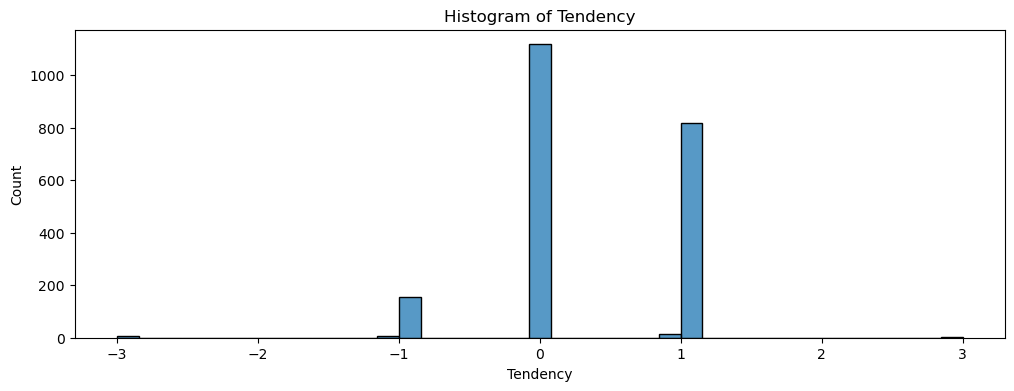

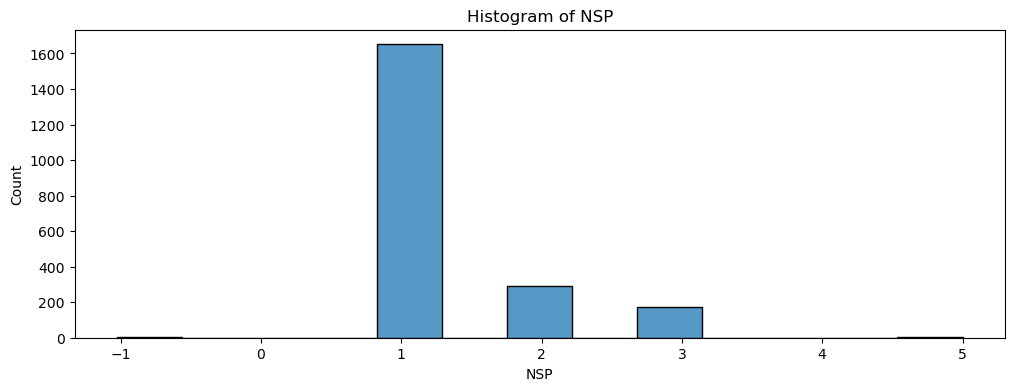

In [244]:
# visualize data by using histogram
for column in df.columns:
    fig = plt.figure(figsize=(12,4))
    sns.histplot(data=df[column])
    plt.title(f"Histogram of {column}")
    plt.show()

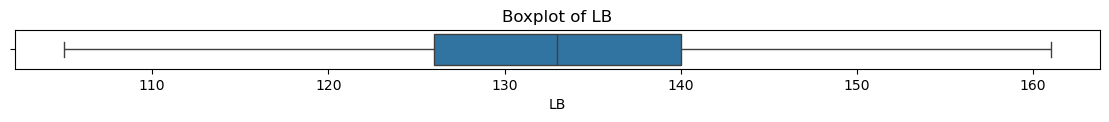

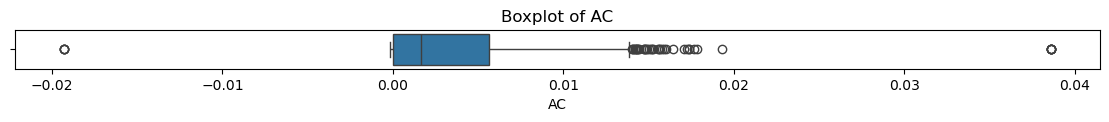

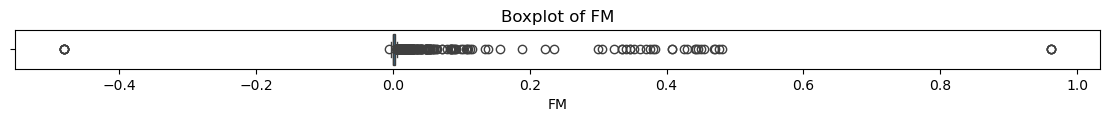

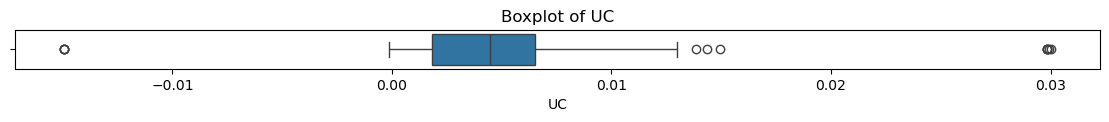

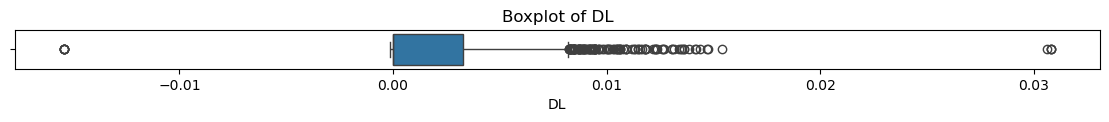

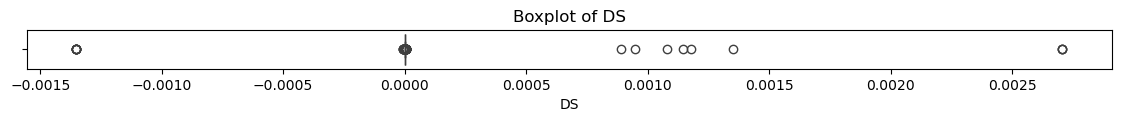

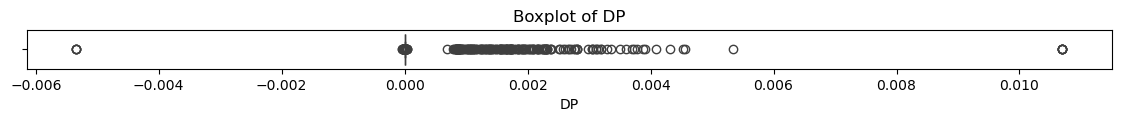

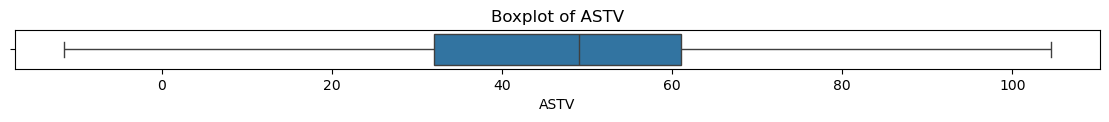

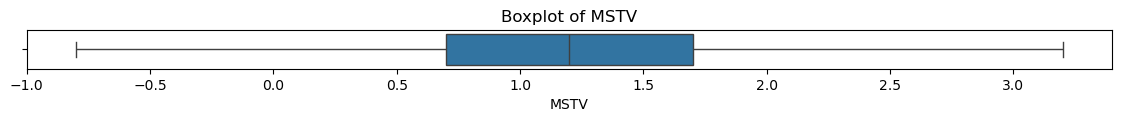

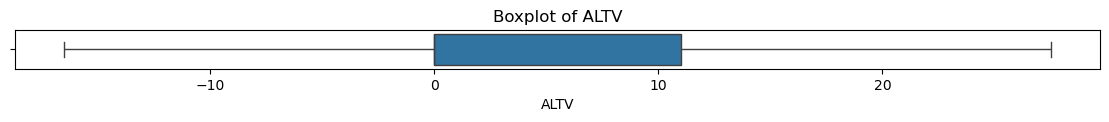

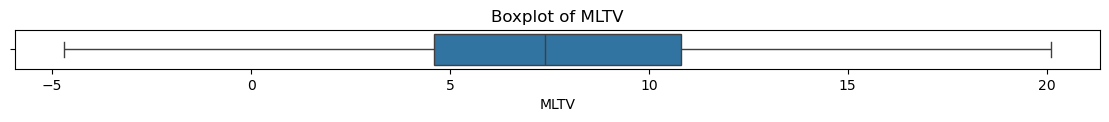

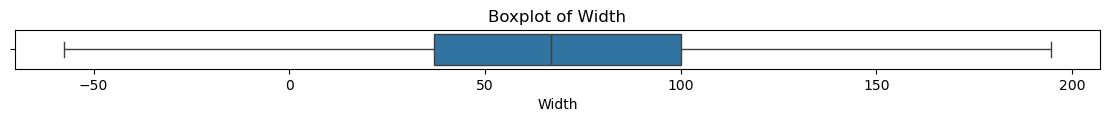

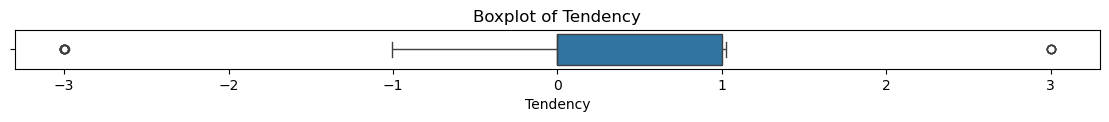

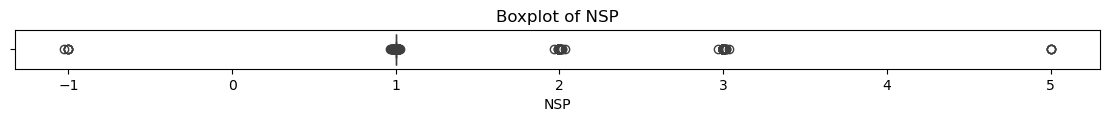

In [245]:
# boxplot for each column
for column in df.columns:
    fig = plt.figure(figsize=(14, 0.5))
    sns.boxplot(data=df, x=column)
    plt.title(f"Boxplot of {column}")
    plt.show()

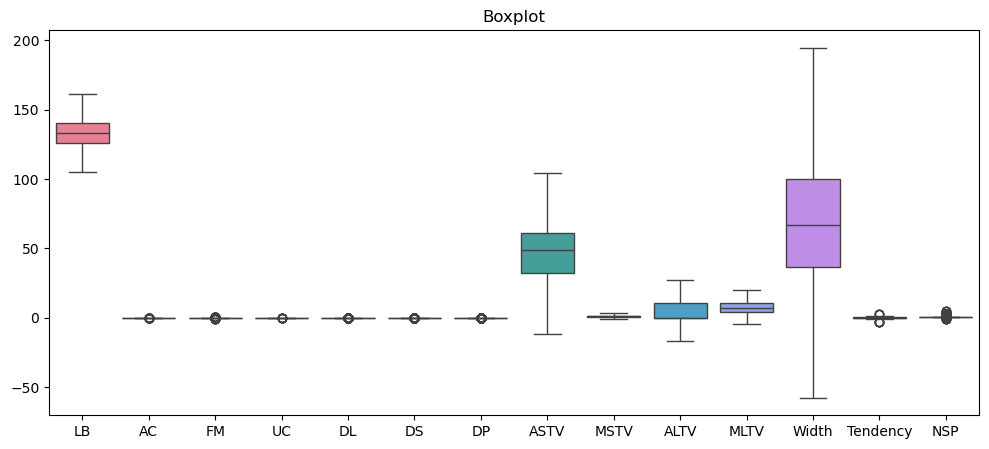

In [246]:
# boxplot for all columns
fig = plt.figure(figsize=(12,5))
sns.boxplot(data=df)
plt.title("Boxplot")
plt.show()

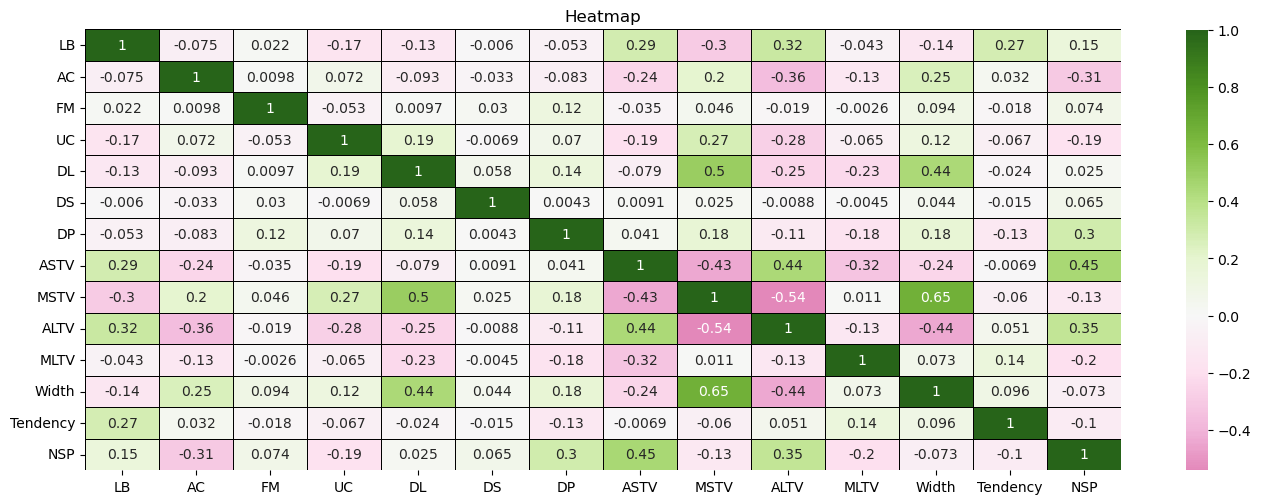

In [247]:
# correlation heatmap
fig = plt.figure(figsize=(14,5))
sns.heatmap(data=df.corr(),cmap='PiYG',center=0,annot=True,linewidths=0.5,linecolor='black')
plt.tight_layout()
plt.title("Heatmap")
plt.show()

In [248]:
# MSTV and Width has the highest positive correlation, MSTV and ALTV has the highest negative correlation

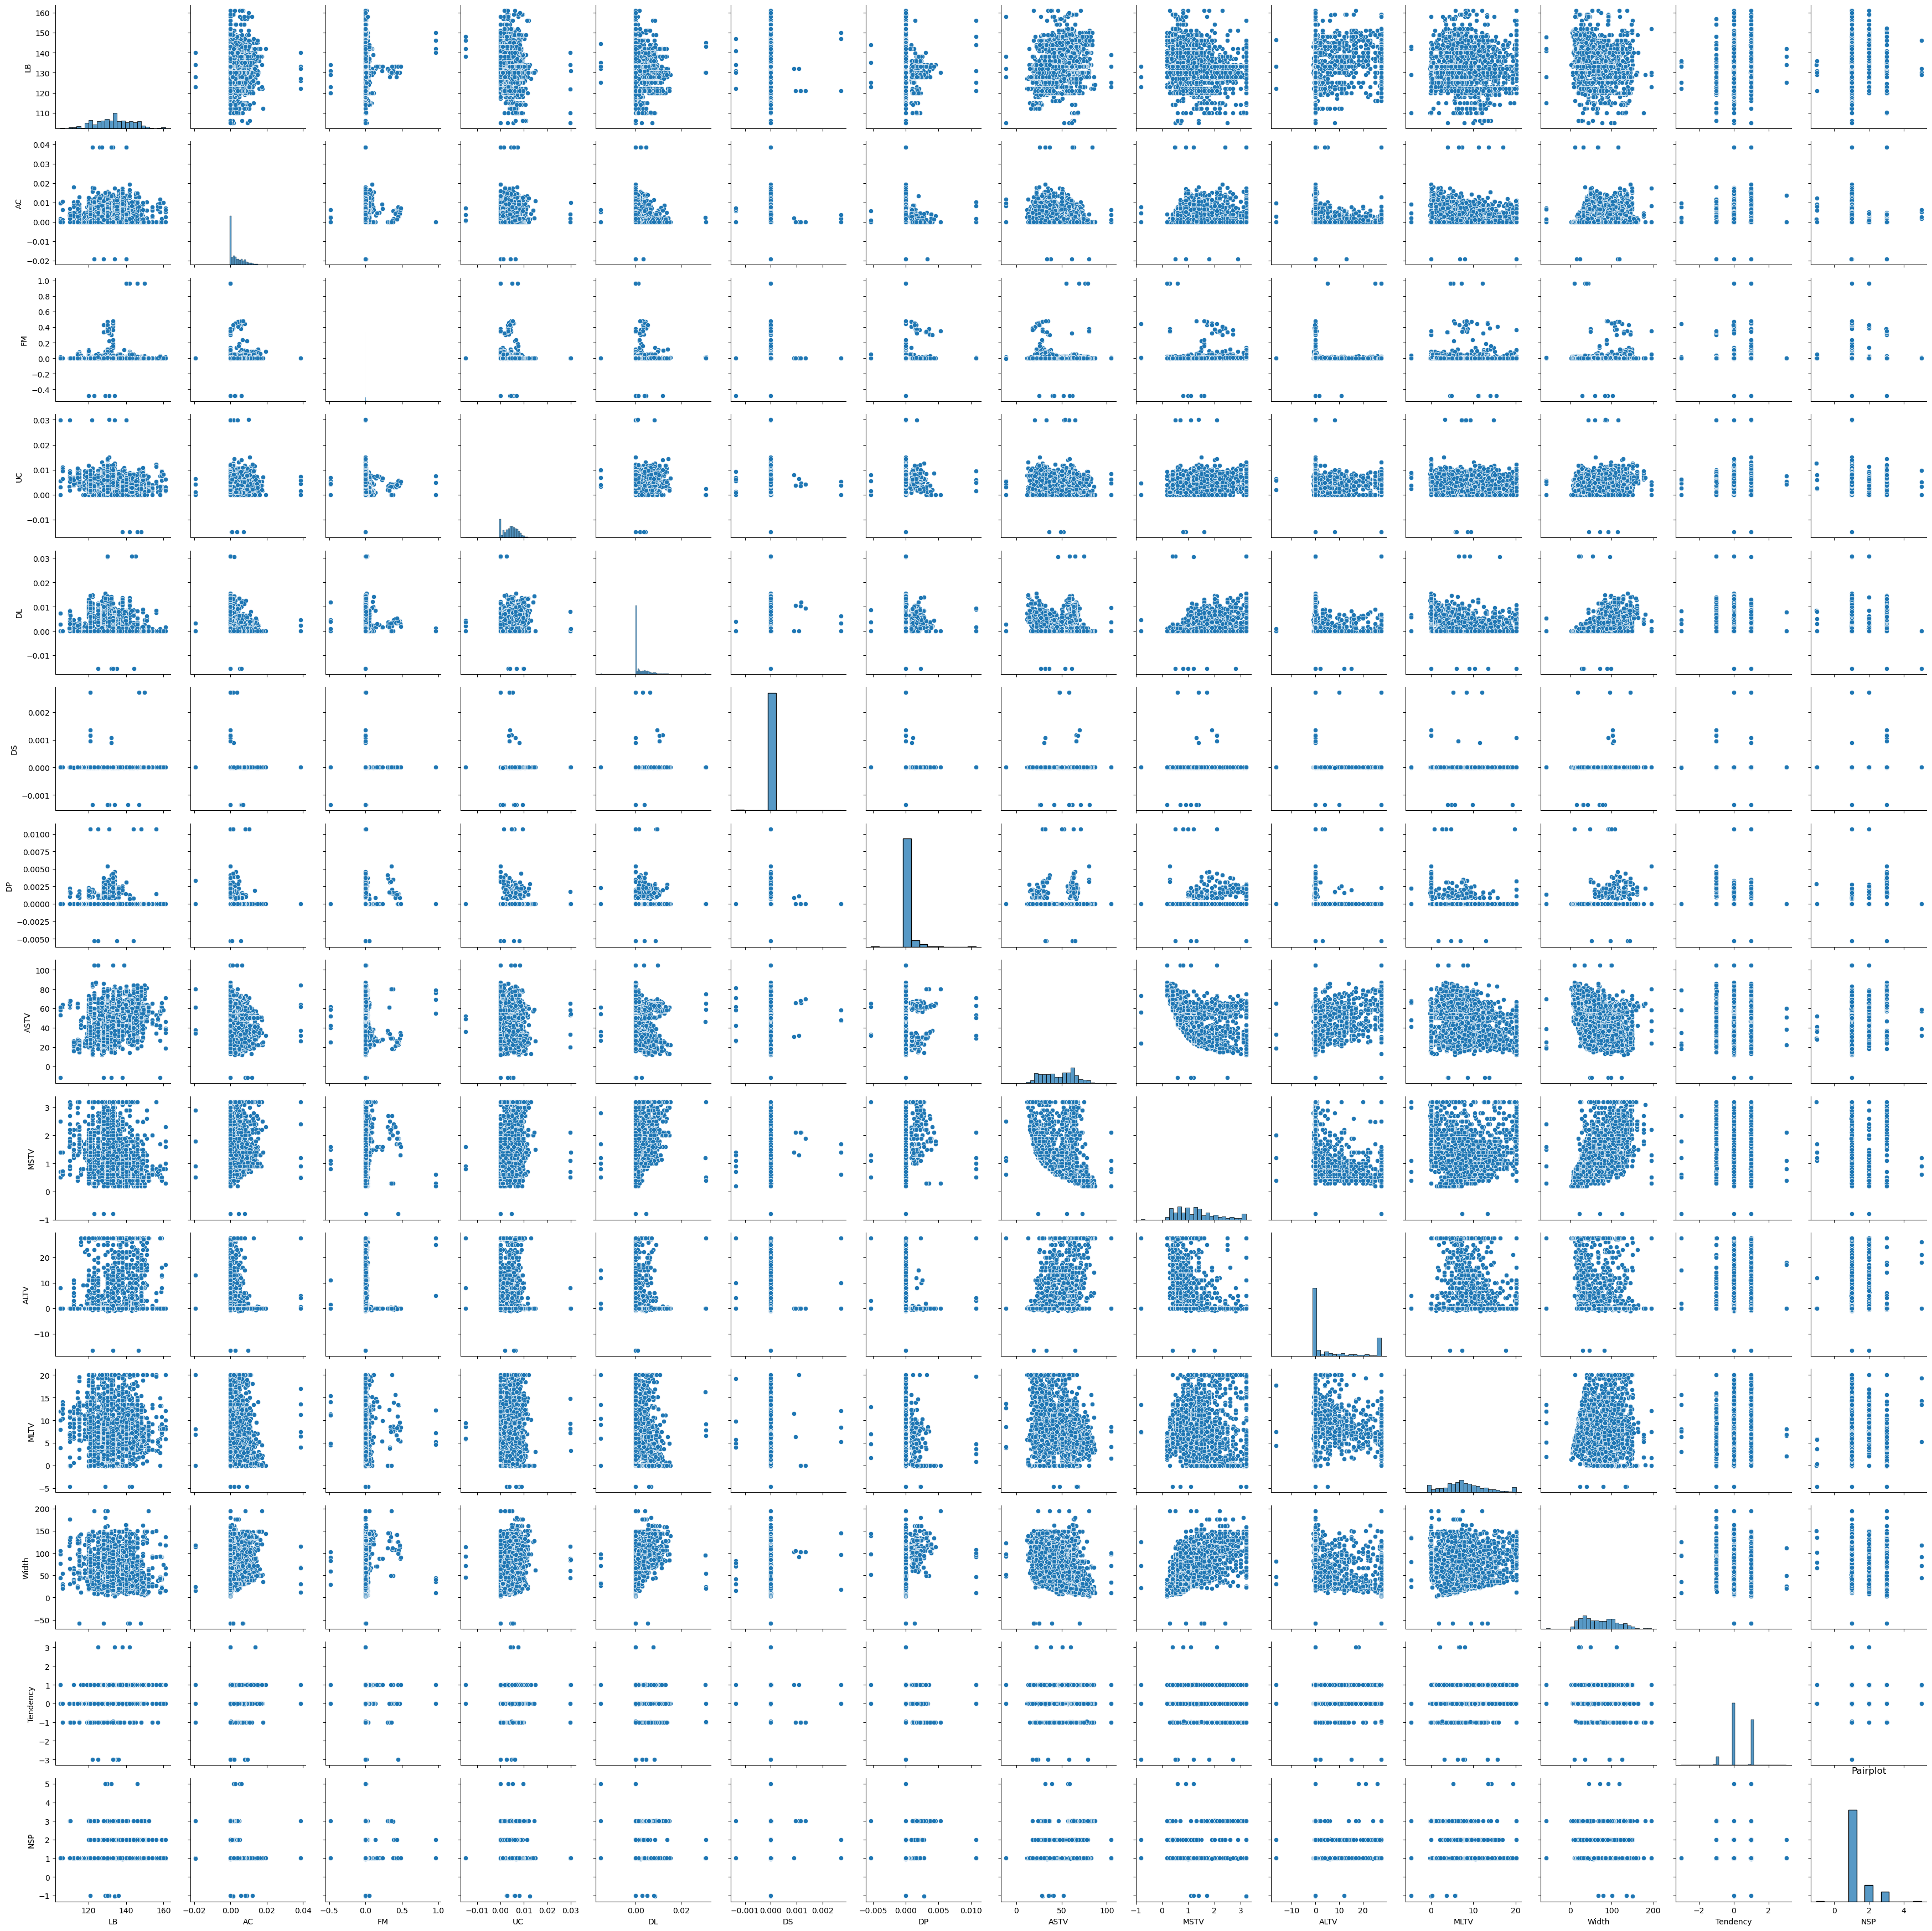

In [249]:
# pairplot to visualize relation between each variable
sns.pairplot(data=df)
plt.tight_layout()
plt.title("Pairplot")
plt.show()

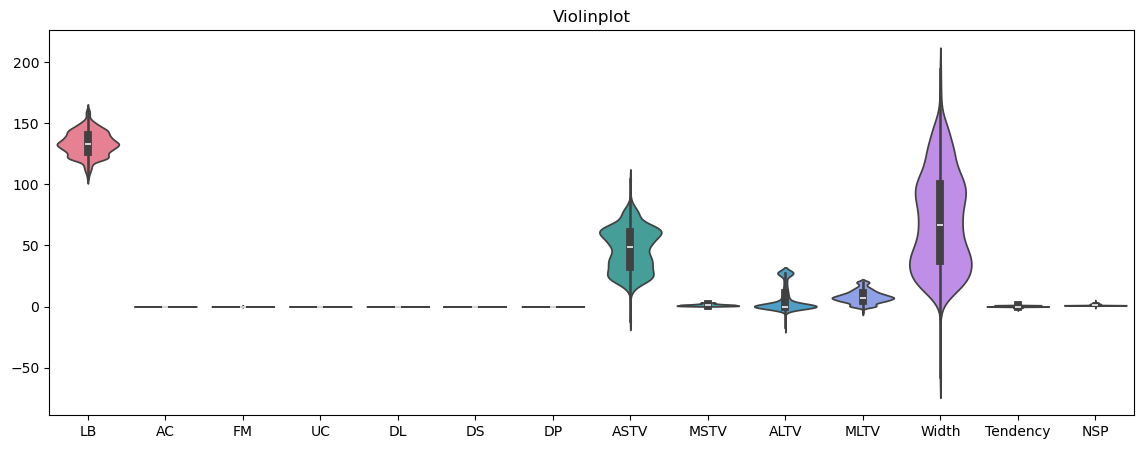

In [250]:
# violinplot
fig = plt.figure(figsize=(14,5))
sns.violinplot(data=df)
plt.title("Violinplot")
plt.show()

## 4.	Pattern Recognition and Insights:

In [252]:
# correlation matrix
df.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.075262,0.021936,-0.165397,-0.133771,-0.006031,-0.052762,0.285623,-0.295600,0.322431,-0.042578,-0.140015,0.273680,0.147370
AC,-0.075262,1.000000,0.009768,0.071621,-0.093449,-0.033088,-0.083298,-0.240239,0.196240,-0.359849,-0.134099,0.249065,0.031710,-0.311689
FM,0.021936,0.009768,1.000000,-0.053226,0.009718,0.029916,0.121459,-0.034965,0.045612,-0.018998,-0.002644,0.094031,-0.017819,0.074446
UC,-0.165397,0.071621,-0.053226,1.000000,0.190128,-0.006938,0.070295,-0.193888,0.267048,-0.275693,-0.065299,0.120217,-0.066832,-0.185229
DL,-0.133771,-0.093449,0.009718,0.190128,1.000000,0.058413,0.144717,-0.078526,0.501842,-0.247226,-0.227200,0.441806,-0.023914,0.024879
DS,-0.006031,-0.033088,0.029916,-0.006938,0.058413,1.000000,0.004321,0.009059,0.025428,-0.008821,-0.004451,0.044143,-0.015294,0.065411
DP,-0.052762,-0.083298,0.121459,0.070295,0.144717,0.004321,1.000000,0.040885,0.175530,-0.112108,-0.179571,0.179787,-0.129204,0.295057
ASTV,0.285623,-0.240239,-0.034965,-0.193888,-0.078526,0.009059,0.040885,1.000000,-0.433844,0.439040,-0.324702,-0.241119,-0.006926,0.447601
MSTV,-0.295600,0.196240,0.045612,0.267048,0.501842,0.025428,0.175530,-0.433844,1.000000,-0.541156,0.011105,0.645744,-0.060457,-0.130305
ALTV,0.322431,-0.359849,-0.018998,-0.275693,-0.247226,-0.008821,-0.112108,0.439040,-0.541156,1.000000,-0.133070,-0.438860,0.050629,0.351421


## 5.	Conclusion:

In [254]:
# When MSTV increases Width will increase. When MSTV increases ALTV decrease